In [34]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def thermo(x, s, a=1):
    if x >= 21:
        s = 'off'
        x_dot = -a*x
    elif x<= 19:
        s = 'on'
        x_dot = -a*(x-30)
    else:
        if s == 'on':
            x_dot = -a*(x-30)
        else:
            x_dot = -a*x
    return x_dot, s

num_steps = 119
def thermo_flow(x_0, s_0):
    dt = 0.0075
    num_steps = 119
    tps = np.empty((num_steps+1, 2))  
    tps[0,1] = x_0
    tps[0,0] = 0
    s = s_0
    noise = np.random.randn(num_steps+1)
    for i in range(1,num_steps+1):
        x_dot, s = thermo(tps[i-1,1], s)
        tps[i,1] = tps[i-1,1]+dt*x_dot+0.001*noise[i-1]
        tps[i,0] = tps[i-1,0]+dt
    return tps

N = 10
xs = [0 for i in range(N)]
for i in range(N):
    x_0 = 18+4*(i/N)
    s = 'off'
    if x_0 <= 19:
        s = 'on'
    xs[i] = thermo_flow(x_0, s)
list_traj = []
ns = int((num_steps+1)/12)
for i in range(N):
    for j in range(ns):
        list_traj.append(xs[i][j*ns:(j+1)*ns,:])
        
print(list_traj[0].shape)
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(10, 2)


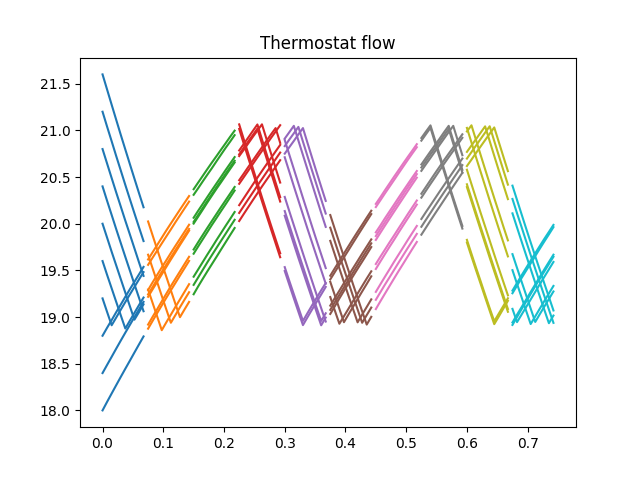

In [35]:
ax = plt.figure().add_subplot()
for i in range(0,len(list_traj)):
    ax.plot(*list_traj[i].T)
ax.set_title("Thermostat flow")
plt.show()

In [36]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar


t2s = Traj2Sim()

load=False

if load == False:
    t2s.set_trajectories(list_traj)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='thermo.npy')
if load == True:
    t2s.load_bifilt(filename='thermo.npy')

|████████████████████████████████████████| 4950/4950 [100%] in 27.6s (179.12/s)  in 1s (185.9/s, eta▁▃▅ 314/4950 [6%] in 2s (173.9/s, eta 346/4950 [7%] in 2s (173.3/s, eta in 2s (174.4/s, eta ▇▇▅ 1686/4950 [34%] in 9s (177.6/s, e in 14s (178.8/s,  in 15s (178.4/s,  in 15s (178.6/s,  ▁▃▅ 3217/4950 [65%] in 18s (177.7/s,  ▃▁▃ 3625/4950 [73%] in 20s (178.2/s, 


(10, 100, 100)


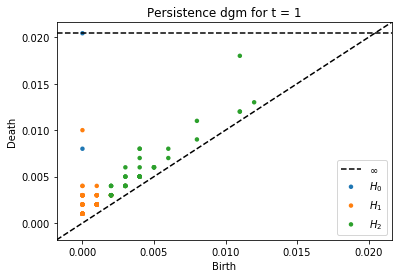

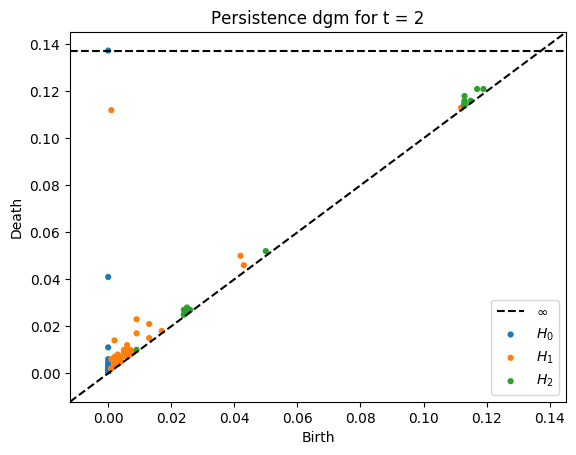

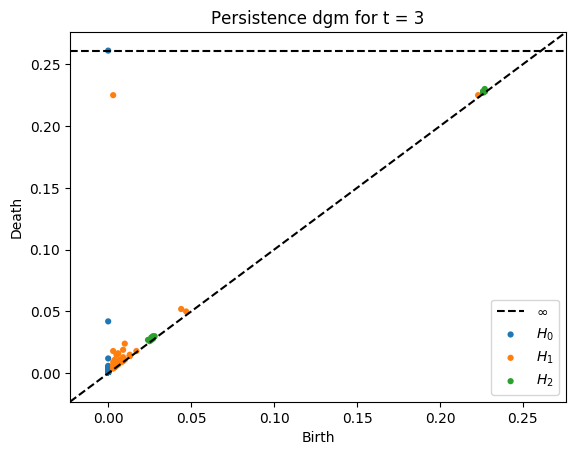

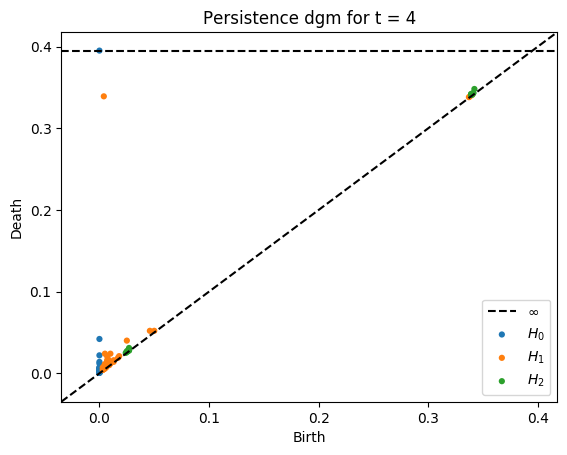

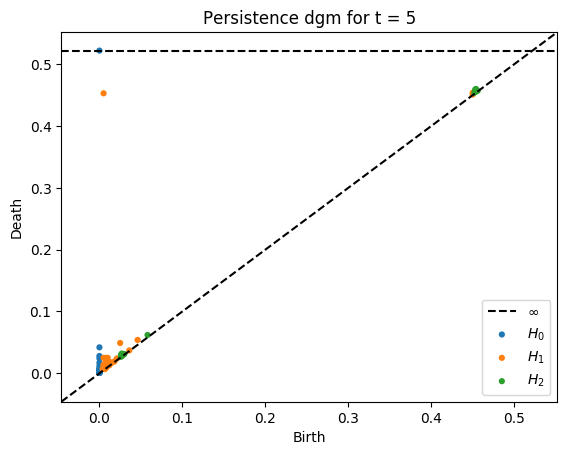

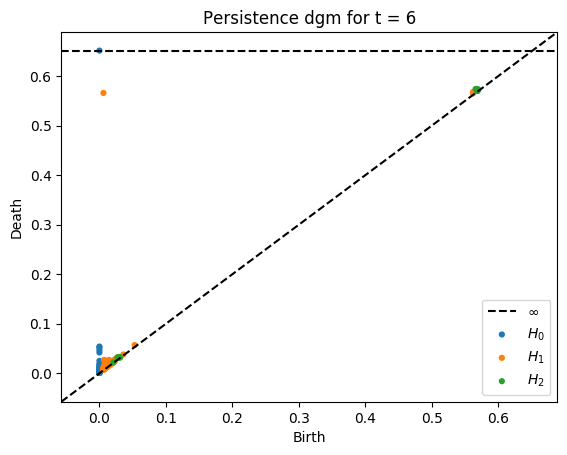

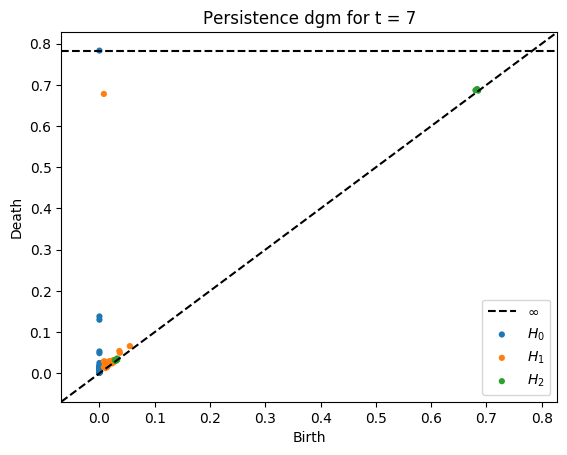

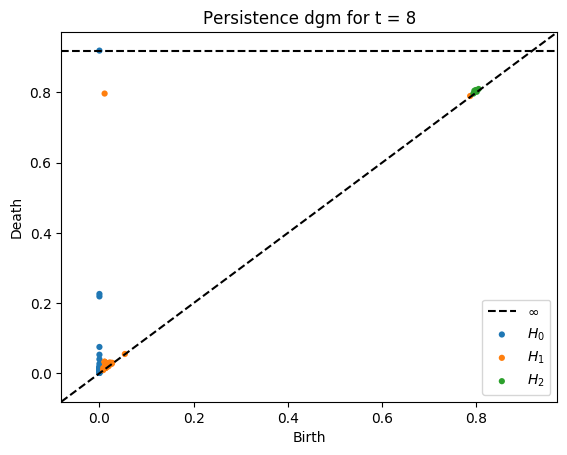

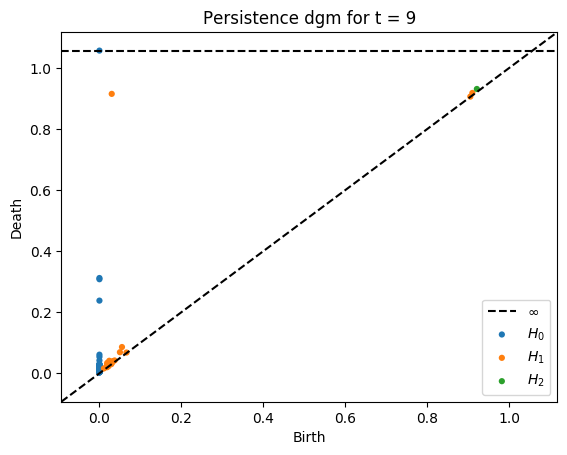

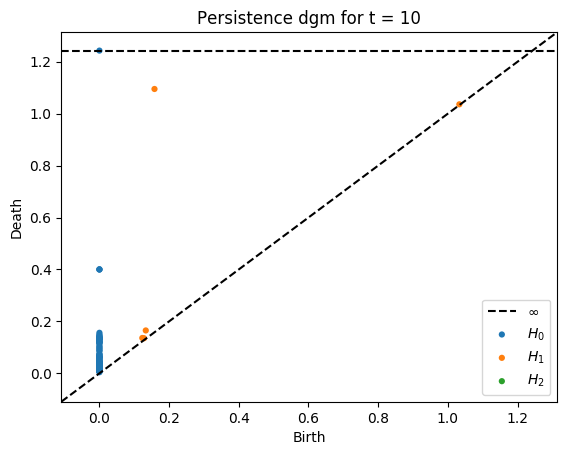

In [37]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

print(t2s.bifilt.shape)

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)